# Series 3 programming exercise:
#### Héctor Andrade Loarca - 375708

In [115]:
#We import some useful libraries
import numpy as np
import numpy.linalg as la
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt
%matplotlib inline  

We have the variational problem:

Find $v\in V\subset L^2(]0,1[)$, such that:
$$ \int_0^1u(x)v(x)dx=\int_0^1 e^xv(x)dx$$
for all $v\in V$.
    
**a)** Lets take the following choices of trail/test spaces, with $n$ the discretization parameter:

- (i)  $ V_n=span\{x^j,k=0,....,n-1\} $
- (ii) $ V_n=span\{sin(k\pi x),k=1,...,n\} $
- (iii) $V_n=span\{\chi_{[\frac{k-1}{n},\frac{k}{n}[},k=1,...,n\}$

Lets compute the resulting linear equation for

- Lets take $u\in V_n$, then $u=\sum_{j=0}^n\alpha_i\phi_j(x)$ then we get the linear system:
$$ \sum_{j=0}^n \alpha_j \int_0^1 \phi_j(x)\phi_i(x) dx=\int_0^1 e^x\phi_i(x)dx$$

Defining, $A_{i,j}=\int_0^1 \phi_j(x)\phi_i(x) dx$ the entries of a matrix **A**, $\alpha_i$ the entries of a vector $\alpha$, and $b_i=\int_0^1 e^x\phi_i(x)d$ the entries of a vector b, the variational problem will be equivalent to the problem:
<h5 align="center">**A** $\alpha$=b</h5> 

- (i) If $V_n=span\{x^j,k=0,....,n-1\}$, then $A_{ij}=\int_0^1 x^ix^j=\frac{1}{i+j}$ if $(i,j)\neq (0,0)$ and $A_{00}=1$.
- (ii) If $V_n=span\{sin(k\pi x),k=1,...,n\} $, the $A_{ij}=\int_0^1 sin(i\pi x)sin(j\pi x) dx=\frac{1}{2}\delta_{i,j}$.
- (iii) If $V_n=span\{\chi_{[\frac{k-1}{n},\frac{k}{n}[},k=1,...,n\}$, then $A_{ij}=\int_0^1 \chi_{[\frac{i-1}{n},\frac{i}{n}[}\chi_{[\frac{j-1}{n},\frac{j}{n}[}=\frac{1}{n}\delta_{i,j}$

**b)** Lets compute the condition number of the coefficient matrices on (i), (ii), notemos primero que ambas matrices son normales ($A^*A=AA^*$) since are diagonal and real then the condition number will be:
$$\kappa(A)=\frac{\lambda_{max}(A)}{\lambda_{min}(A)}$$.

Lets compute the maximum and minimum eigenvalue of the matrices.

#We define a function that computes the condition parameter for a normal matrix A
def cond(A):
    B=la.eigvals(A)
    return max(B)/min(B)

- (ii) $A_{ij}=\int_0^1 sin(i\pi x)sin(j\pi x) dx=\frac{1}{2}\delta_{i,j}$

In [43]:
#We define the matrix in a function dependent on n-discretization parameter
def A2(n):
    return 1./2*np.identity(n)
#lets take n=10
n=10
#The condition number of the matrix will be
K2=cond(A2(10))
K2

1.0

As the matrix **A1** is diagonal, in general for any $n$ the condition number will be 1.

- (iii) $A_{ij}=\int_0^1 \chi_{[\frac{i-1}{n},\frac{i}{n}[}\chi_{[\frac{j-1}{n},\frac{j}{n}[}=\frac{1}{n}\delta_{i,j}$

In [44]:
#We define the matrix in a function dependent on n-discretization parameter
def A3(n):
    return 1./n*np.identity(n)
#lets take n=10
n=10
#The condition number of the matrix will be
K3=cond(A3(10))
K3

1.0

Again, the matrix **A2** is diagonal, then the condition number will be 1 again.

**c)** Lets calculate the condition number for the matrix in (i) ($A_{ij}=\int_0^1 x^ix^j=\frac{1}{i+j}$ if $(i,j)\neq (0,0)$ and $A_{00}=1$), for n=1,2,...,10

In [69]:
#We define the matrix in a function dependent on n-discretization parameter
def A1(n):
    A=np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if i==0 and j==0:
                A[i,j]=1 #The entry (0,0)
            else:
                A[i,j]=1/float(i+j)
    return A

In [99]:
# Lets calculate the condition number for n=1,...10
cond1=[cond(A1(n)) for n in range(1,11)]

In [100]:
for i in range(10):
    print("The cond. number for n="+str(i+1)+" is "+str(cond1[i]))

The cond. number for n=1 is 1.0
The cond. number for n=2 is -6.34232921921
The cond. number for n=3 is -6.94089087785
The cond. number for n=4 is -7.32226916585
The cond. number for n=5 is -7.55796868654
The cond. number for n=6 is -7.71951643366
The cond. number for n=7 is -7.8402862685
The cond. number for n=8 is -7.93624626002
The cond. number for n=9 is -8.01574786418
The cond. number for n=10 is -8.08356432617


**d)** Lets plot the condiition number of the schemes (i)-(iii) for $n=1,...,10$

- (i) $A_{ij}=\int_0^1 x^ix^j=\frac{1}{i+j}$ if $(i,j)\neq (0,0)$ and $A_{00}=1$

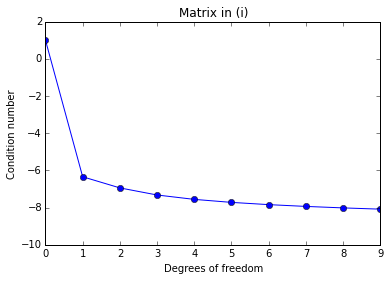

In [110]:
cond1=[cond(A1(n)) for n in range(1,11)]
plt.plot(cond1, '-o')
plt.xlabel('Degrees of freedom')
plt.ylabel('Condition number')
plt.title('Matrix in (i)')

- (ii) $A_{ij}=\int_0^1 sin(i\pi x)sin(j\pi x) dx=\frac{1}{2}\delta_{i,j}$.

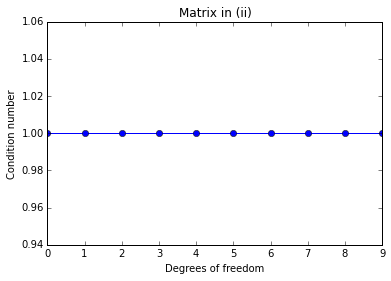

In [114]:
cond2=[cond(A2(n)) for n in range(1,11)]
plt.plot(cond2, '-o')
plt.xlabel('Degrees of freedom')
plt.ylabel('Condition number')
plt.title('Matrix in (ii)')

- (ii) $A_{ij}=\int_0^1 \chi_{[\frac{i-1}{n},\frac{i}{n}[}\chi_{[\frac{j-1}{n},\frac{j}{n}[}=\frac{1}{n}\delta_{i,j}$

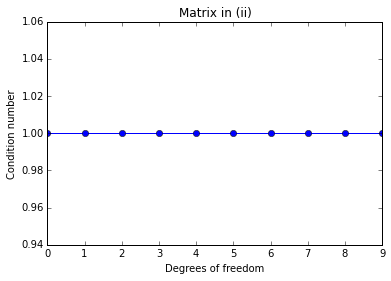

In [113]:
cond3=[cond(A3(n)) for n in range(1,11)]
plt.plot(cond3, '-o')
plt.xlabel('Degrees of freedom')
plt.ylabel('Condition number')
plt.title('Matrix in (ii)')

**e)** Lets compute the $L^2(]0,1[)$-norm of the discretization error for the problem (iii) as a function of the discretization parameter $n$ using Python. The $L^2(]0,1[)$-norm of the discretization error will be:
$$||e_n||_{L^2(]0,1[)}=||u-u_n||_{L^2(]0,1[)}$$
Where $$u=e^x$$
and $$u_n=\sum_{i=1}^n \alpha_i \chi_{[\frac{i-1}{n},\frac{i}{n}[} $$
where $\alpha_i$ are the entries of the vector-solution of the linear system:
$$\mathbb{A}\alpha=b$$
and the entries $b_i$ of b are
$$ b_i=\int_0^1 e^x \chi_{[\frac{i-1}{n},\frac{i}{n}[}=e^x\bigg|_{\frac{i-1}{n}}^{\frac{i}{n}}=e^{\frac{i}{n}}-e^{\frac{i-1}{n}}=e^{\frac{i}{n}}(1-e^{-\frac{1}{n}})$$

Now lets compute the error:
$$
||u-u_n||^2_{L^2(]0,1[)}=\int_0^1\left(e^x-\sum_{i=1}^n\alpha_i\chi_{[\frac{i-1}{n},\frac{i}{n}[} \right)^2 dx 
=\frac{e^2-1}{2}-2(1-e^{-\frac{1}{n}})\sum_{i=1}^n \alpha_i e^{\frac{i}{n}}+\frac{1}{n}\sum_{i=1}^n\alpha_i^2
$$

Since $\alpha$ is the solution of the system $\mathbb{A}\alpha=b$, then as $\mathbb{A}$ is invertible in the case (iii), then $\alpha=\mathbb{A}^{-1}b$. Lets define the function of the L2-norm of the error in terms of the discretizatin parameter n.

In [198]:
def error(n):
    #We compute firs the vector b
    b=np.array([np.exp(float(i)/n)*(1-np.exp(-1./n)) for i in range(1,n+1)])
    #We compute first the vector
    alpha=la.inv(A3(n)).dot(b)
    #Lets define a helpful vector for the second term in error L2 norm
    ev=np.array([np.exp(float(i)/n) for i in range(1,n+1)])
    #then we compute the error
    return np.sqrt(abs((np.exp(2.)-1)/2-2.*(1-np.exp(-1./n))*alpha.dot(ev)+(1/n)*sum(alpha**2)))

In [227]:
#Now lets compute a vector of errors depending on the discretazation parameter n from 1 to 20
errorvec=[error(n) for n in range(1,11)]

In [228]:
#Lets compute the rate of converence
#Lets take de logaritmic difference of the error vector and divide by de logaritmic difference of the n-vect
errorlogdiff=np.diff(np.log(errorvec))
nlogdiff=np.diff(np.log(np.array(range(1,11))))
rate=errorlogdiff/nlogdiff

Lets plot finally the rate of convergence

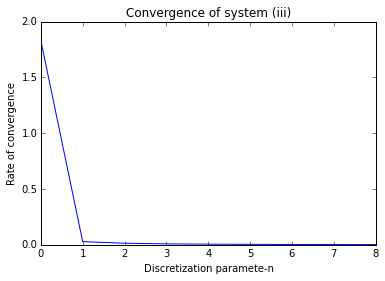

In [229]:
plt.plot(rate)
plt.xlabel('Discretization paramete-n')
plt.ylabel('Rate of convergence')
plt.title('Convergence of system (iii)')